In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import pickle

## Data

In [2]:
df = pd.read_csv('./example.csv')

In [3]:
df_select = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'Survived']].fillna('unknown')

In [4]:
df_select['Cabin_init'] = df_select.Cabin.apply(lambda x: x[0])

In [5]:
df_select = df_select.drop('Cabin', axis=1)

In [6]:
df_select_dummies = pd.get_dummies(df_select)

In [7]:
df_train, _ = train_test_split(df_select_dummies, test_size = 0.3)

In [8]:
X_train = df_train[[x for x in df_train.columns if x!='Survived']]
y_train = df_train['Survived']

In [9]:
df_test = df_select_dummies
X_test = df_test[[x for x in df_test.columns if x!='Survived']]
y_test = df_test['Survived']

## Training

In [10]:
clf = MLPClassifier(solver='adam', alpha=1e-5, max_iter=500,
                    hidden_layer_sizes=(100, 50, 10, 2), activation='logistic')

In [11]:
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
y_pred = clf.predict_proba(np.array(X_test))[:,1]

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.8440519178943107

## Evaluation

In [14]:
import sys
sys.path.append('..')

In [15]:
model = clf

### Discrete Precision/Recall Plot (Binary-Classification only)

In [16]:
from pytalite.interpretation import decile_plot

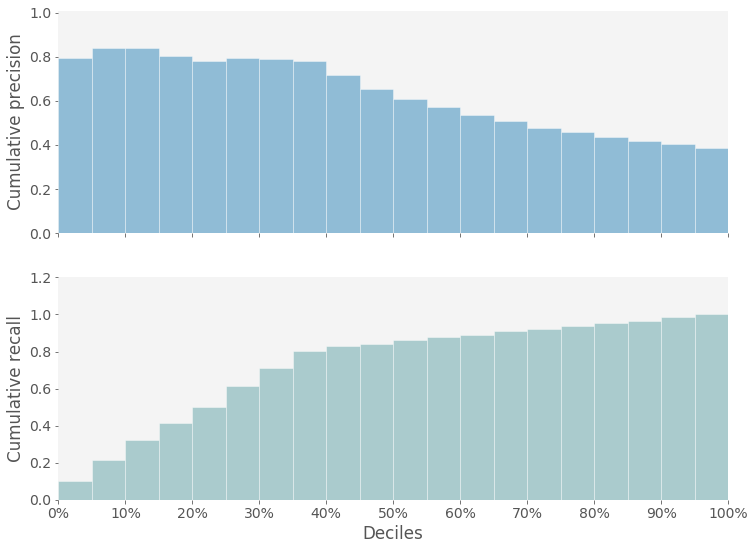

In [17]:
decile_plot(df_test, 'Survived', model, columns_to_exclude=(), num_deciles=20)

### Probability Density Plot (Binary-Classification only)

In [18]:
from pytalite.interpretation import density_plot

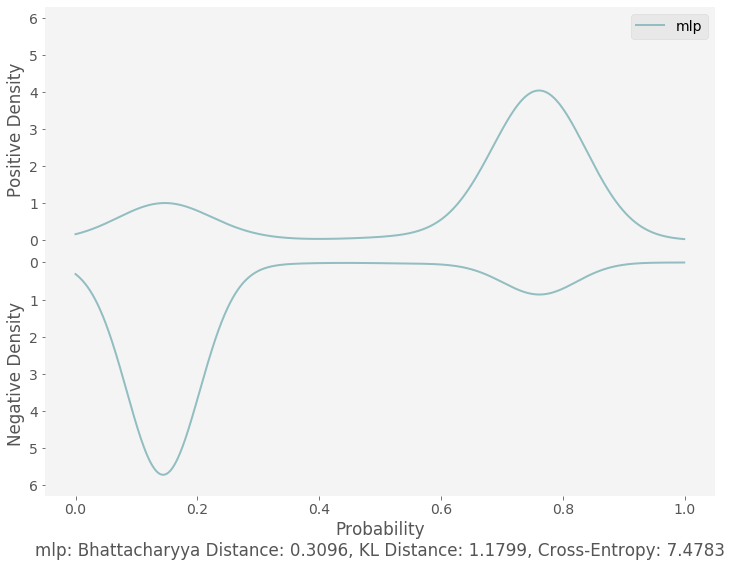

In [19]:
density_plot(df_test, 'Survived', [model], model_names=('mlp',), columns_to_exclude=())

### Feature Importance Plot (Binary-Classification only)

In [20]:
from pytalite.interpretation import feature_importance_plot

Start Multiprocessing, num_processes=12

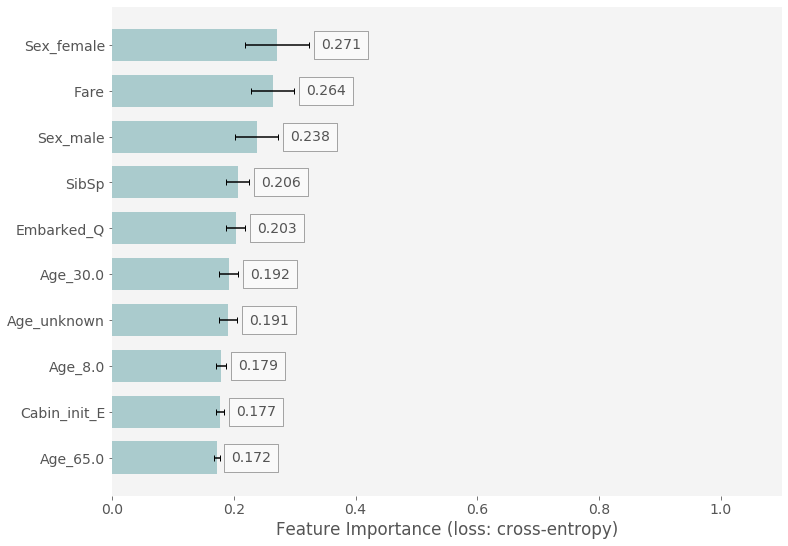

In [21]:
feature_importance_plot(df_test, 'Survived', model, columns_to_exclude=(), n_jobs=-1, n_top=10)

### Feature Correlation Plot (Binary-Classification only)

In [22]:
from pytalite.interpretation import feature_correlation_plot

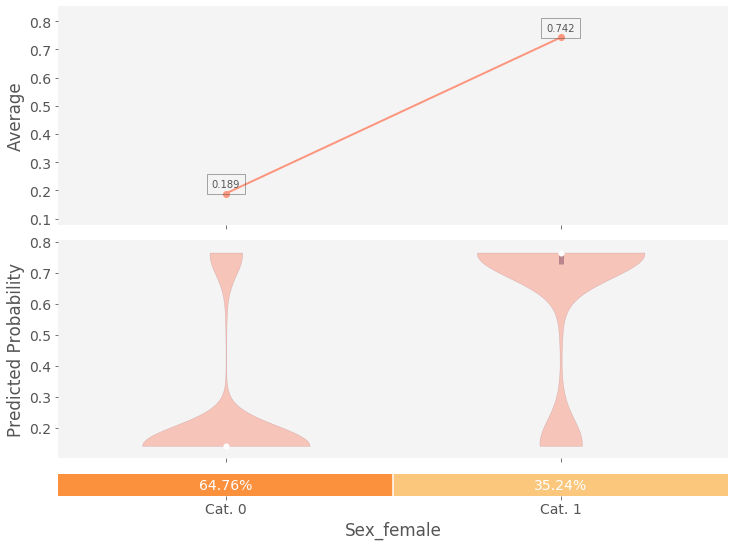

In [23]:
feature_correlation_plot(df_test, 'Survived', model, 'Sex_female', columns_to_exclude=())

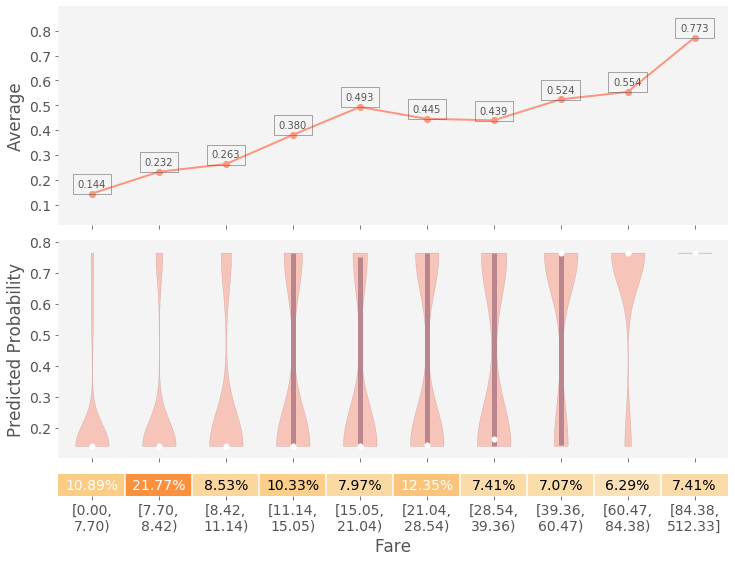

In [24]:
feature_correlation_plot(df_test, 'Survived', model, 'Fare', columns_to_exclude=())

### Accumulated Local Effect Plot (Binary-Classification / Regression, numerical feature)

In [25]:
from pytalite.interpretation import feature_ale_plot

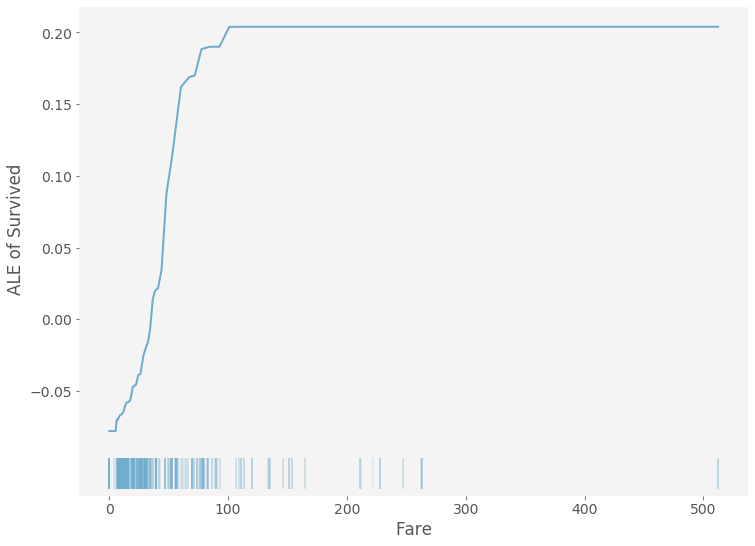

In [26]:
feature_ale_plot(df_test, 'Survived', model, 'Fare', predictor=lambda x: model.predict_proba(x)[:, 1],
                 columns_to_exclude=(), bins=50)

### Partial Dependence Plot (Binary-Classification / Regression)

In [27]:
from pytalite.interpretation import partial_dependence_plot

Start Multiprocessing, num_processes=12

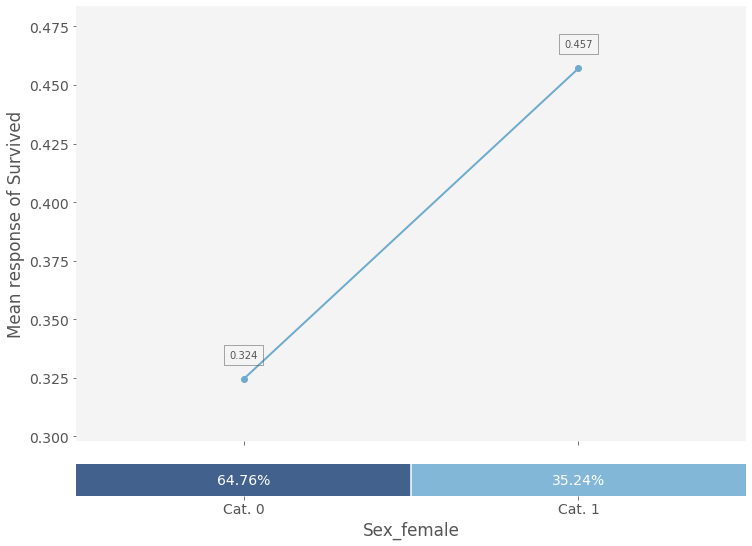

In [28]:
partial_dependence_plot(df_test, 'Survived', model, 'Sex_female', predictor=lambda x: model.predict_proba(x)[:, 1],
                        columns_to_exclude=(), n_jobs=-1)

Start Multiprocessing, num_processes=12

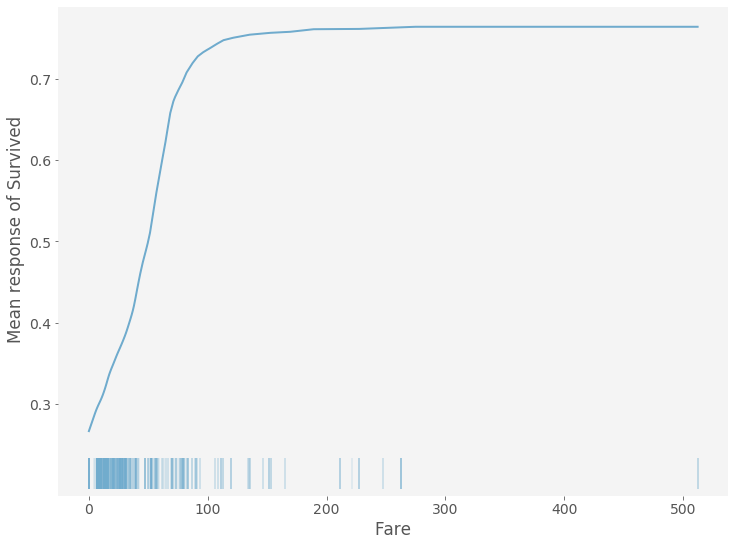

In [29]:
partial_dependence_plot(df_test, 'Survived', model, 'Fare', predictor=lambda x: model.predict_proba(x)[:, 1],
                        columns_to_exclude=(), n_jobs=-1)

### Plot Adjustment

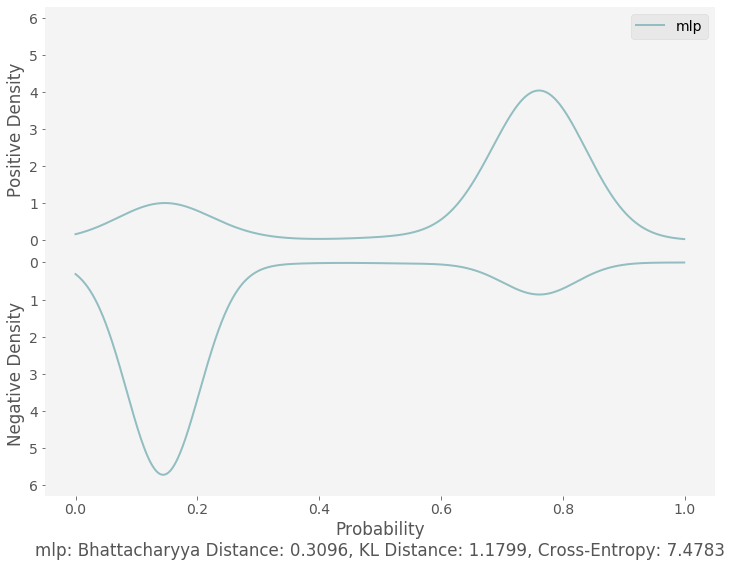

In [30]:
pw = density_plot(df_test, 'Survived', [model], model_names=('mlp',), columns_to_exclude=())

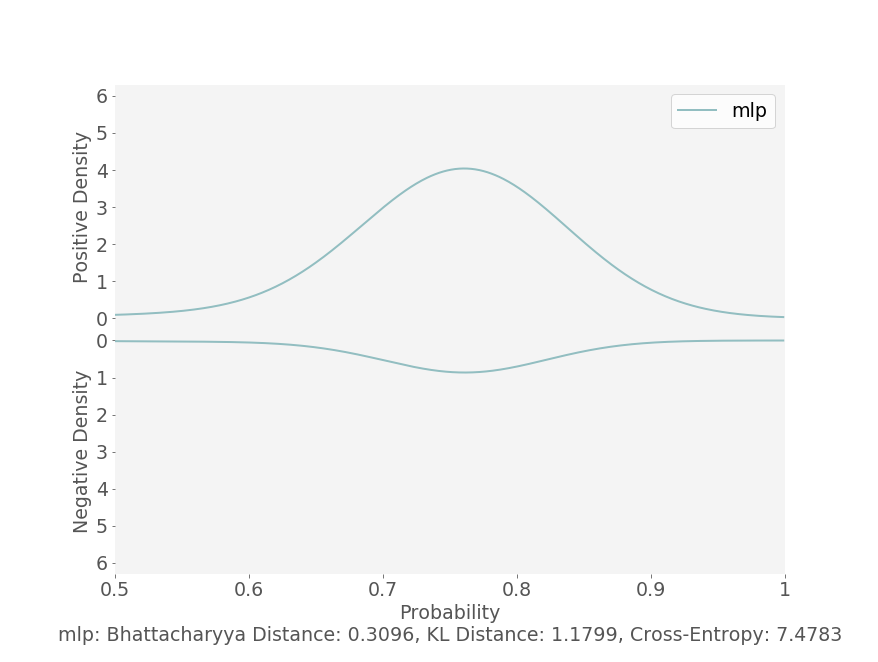

In [31]:
from matplotlib.font_manager import FontProperties as fp
pw.adjust_plot({'ylabel_fp': fp(size=19), 'yticklabel_fp': fp(size=19),
                'legend_fp': fp(size=19), 'xlim': (0.5, 1), 'xticks':[], 'ax_id': 0},
               {'xlabel_fp': fp(size=19), 'ylabel_fp': fp(size=19),
                'xticklabel_fp': fp(size=19), 'yticklabel_fp': fp(size=19), 'xlim': (0.5, 1), 'ax_id': 1})
pw.display_plot()

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df_test.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived', 'Sex_female',
       'Sex_male', 'Age_0.42', 'Age_0.67', 'Age_0.75',
       ...
       'Embarked_unknown', 'Cabin_init_A', 'Cabin_init_B', 'Cabin_init_C',
       'Cabin_init_D', 'Cabin_init_E', 'Cabin_init_F', 'Cabin_init_G',
       'Cabin_init_T', 'Cabin_init_u'],
      dtype='object', length=109)